In [1]:
from keras.models import load_model
import numpy as np
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, activations
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import os
from imutils import paths
import glob

Using TensorFlow backend.
C:\Users\Devashi Jain\DMG\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Devashi Jain\DMG\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Devashi Jain\DMG\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Devashi Jain\DMG\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
Data = np.load('Data.npy')
Label = pd.read_csv('Label.csv')
classes = pd.read_csv('Class.csv')

In [3]:
Data.shape

(2217, 256, 256, 3)

In [4]:
Label.shape

(2217, 1)

In [5]:
print(classes.shape)

(2217, 1)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(Data/255.,classes,test_size=0.1,random_state=0)

In [7]:
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [8]:
X_train_cnn = X_train.reshape(X_train.shape[0], 3, 256, 256).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 3, 256, 256).astype('float32')

In [9]:
X_train_cnn.shape

(1995, 3, 256, 256)

In [10]:
X_test_cnn.shape

(222, 3, 256, 256)

In [11]:
def cnn_model():
    model = Sequential() # our defined model functions in some sort of sequence, we use the Sequential class to initialize our model before adding the layers

    # Here's how you add layers to your model
    # Conv1 32 32 (3) => 30 30 (32)
    model.add(Conv2D(32, (3, 3), input_shape=(3, 256, 256), activation = 'relu')) # in layer 1 you need to specify input shape this is not needed in subsequent layers
    
    # Conv2 30 30 (32) => 28 28 (32)
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    
    # Pool1 28 28 (32) => 14 14 (32)
    model.add(MaxPooling2D(pool_size=(2, 2))) # the CONV CONV POOL structure is popularized in during ImageNet 2014
    model.add(Dropout(0.25)) # this thing called dropout is used to prevent overfitting

    # Conv3 14 14 (32) => 12 12 (64)
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    
    # Conv4 12 12 (64) => 6 6 (64)
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    
    # Pool2 6 6 (64) => 3 3 (64)
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # FC layers 3 3 (64) => 576
    model.add(Flatten()) # to turn input into a 1 dimensional array
    # Dense1 576 => 256
   
    
    model.add(Dropout(0.5))
    # Dense2 256 => 10
    model.add(Dense(4, activation= 'softmax'))
    
    optimizer = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

In [12]:
print("[INFO] creating model...")
model = cnn_model()
# Fit the model
print("[INFO] training model...")
records = model.fit(X_train_cnn, y_train_cnn, validation_split=0.1, epochs=25, batch_size=16)
# Final evaluation of the model
print("[INFO] evaluating model...")
scores = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Final CNN accuracy: ', scores[1])

[INFO] creating model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
[INFO] training model...
Instructions for updating:
Use tf.cast instead.
Train on 1795 samples, validate on 200 samples
Epoch 1/25
1795/1795 [==============================] - 556s 309ms/step - loss: 1.2583 - acc: 0.4930 - val_loss: 0.7358 - val_acc: 0.7450
Epoch 2/25
1795/1795 [==============================] - 582s 324ms/step - loss: 0.5910 - acc: 0.7967 - val_loss: 0.7605 - val_acc: 0.7650
Epoch 3/25
1795/1795 [==============================] - 581s 324ms/step - loss: 0.4204 - acc: 0.8591 - val_loss: 0.4412 - val_acc: 0.8650
Epoch 4/25
1795/1795 [==============================] - 554s 309ms/step - loss: 0.3028 - acc: 0.8953 - val_loss: 0.4496 - val_acc: 0.8450
Epoch 5/25
1795/1795 [==============================] - 554s 309ms/step - loss: 0.2433 - acc: 0.9175 - val_loss: 0.5

In [13]:
print("[INFO] saving model...")
model.save("model3.h5")

[INFO] saving model...


C:\Users\Devashi Jain\DMG\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


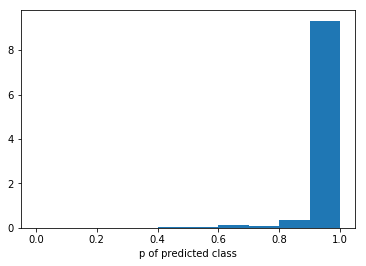

In [15]:
import matplotlib.pyplot as plt
cnn_probab = model.predict(X_test_cnn, batch_size=32, verbose=0)

# extract the probability for the label that was predicted:
p_max = np.amax(cnn_probab, axis=1)

plt.hist(p_max, normed=True, bins=list(np.linspace(0,1,11)));
plt.xlabel('p of predicted class');

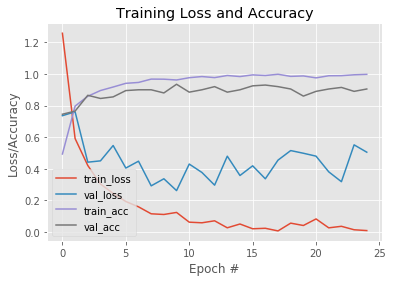

In [17]:
N = 25
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), records.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), records.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), records.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), records.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")